In [1]:
import pandas as pd
import numpy as np
import pycmap
from datetime import datetime, timedelta
import pytz
import matplotlib.pyplot as plt
import os
import glob
import plotly.express as px

## calling in licor par

In [11]:
licor_par = pd.read_csv('/Users/ceg/Desktop/kristine/SACNAS-2023-project/licor_hourly_par.csv')
licor_par['datetime'] = pd.DatetimeIndex(licor_par.datetime.values)
licor_par

,Unnamed: 0,datetime,mean_PAR
0,0,2021-11-19 16:00:00+00:00,401.968333
1,1,2021-11-19 17:00:00+00:00,486.087167
2,2,2021-11-19 18:00:00+00:00,891.885167
3,3,2021-11-19 19:00:00+00:00,1092.274333
4,4,2021-11-19 20:00:00+00:00,1002.763667
...,...,...,...
577,577,2021-12-13 17:00:00+00:00,234.544417
578,578,2021-12-13 18:00:00+00:00,688.223000
579,579,2021-12-13 19:00:00+00:00,1092.185333
580,580,2021-12-13 20:00:00+00:00,1320.478000


## Calling in Hyperpro profile PAR

In [3]:
df = pd.read_csv('Gradients 4 - TN397 - Hyperpro Profiles.csv', usecols = ['kpar', 'flu', 'light_level', 'par_z', 'sal', 'dens', 'temp', 'time', 'lat', 'lon', 'depth'])
df['time'] = pd.DatetimeIndex(df.time.values)
df.dropna()
df1 = df.groupby([pd.Grouper(key = 'time', freq = 'H'), 'depth']).agg({'par_z': 'mean',
                                                             'temp': 'mean',
                                                             'flu': 'mean'}).reset_index()
df1

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1204993369.py, line 4)

In [17]:
## merging licor and hyperpro data together
licor_hyper = pd.merge(df1, licor_par, left_on = 'time', right_on = 'datetime', how = 'inner')
licor_hyper.iloc[200]

time          2021-11-28 21:00:00+00:00
depth                                27
par_z                            154.33
temp                              26.61
flu                               0.089
Unnamed: 0                          221
datetime      2021-11-28 21:00:00+00:00
mean_PAR                     937.842667
Name: 200, dtype: object

## PAR plot

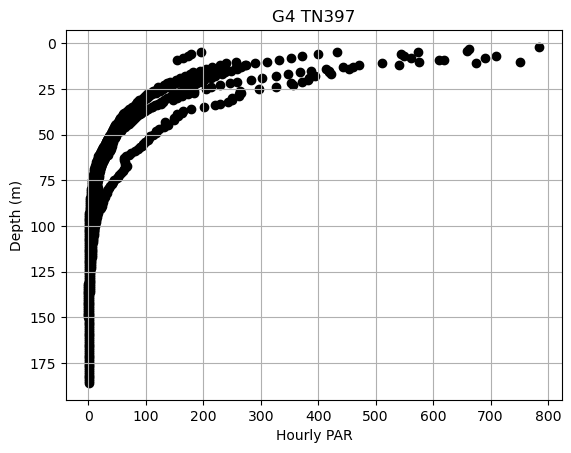

In [24]:
x = df1['par_z']
y1 = df1['depth']

plt.scatter(x, y1, c = 'k', label = 'PAR')

plt.xlabel("Hourly PAR")
plt.ylabel("Depth (m)")
plt.title("G4 TN397")
#plt.legend()
plt.grid()
plt.gca().invert_yaxis()

In [4]:
# trying to plot date as color to differentiate the days since idk how to in matplotlib but cant bc of error
fig = px.scatter(df1, x='par_z', y='depth', color='time', title='TN397')
fig.update_yaxes(autorange="reversed")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## Temperature Depth Profile

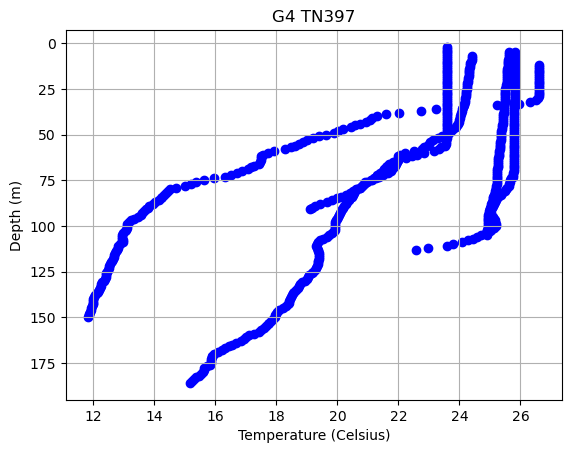

In [25]:
x = df1['temp']
y1 = df1['depth']

plt.scatter(x, y1, c = 'blue', label = 'temp')

plt.xlabel("Temperature (Celsius)")
plt.ylabel("Depth (m)")
plt.title("G4 TN397")
#plt.legend()
plt.grid()
plt.gca().invert_yaxis()

## Chlorophyll Depth Profile

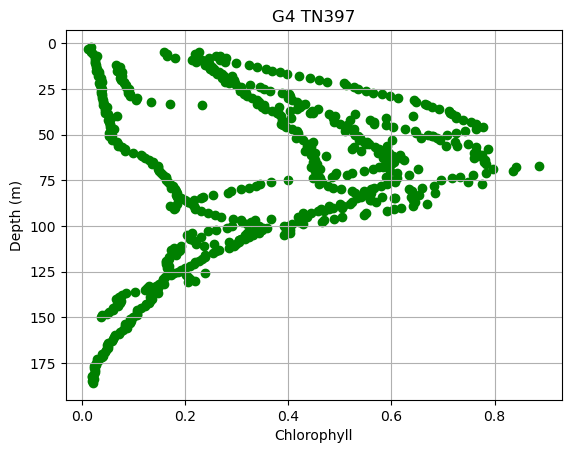

In [26]:
x = df1['flu']
y1 = df1['depth']

plt.scatter(x, y1, c = 'green', label = 'chloro')

plt.xlabel("Chlorophyll")
plt.ylabel("Depth (m)")
plt.title("G4 TN397")
#plt.legend()
plt.grid()
plt.gca().invert_yaxis()